In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
# Importing the training and testing sets
%run "./Data Splitting.ipynb"

In [3]:
df.groupby("REPORT_DATE").agg({
    "IN_DENOMINATIONS":"sum","REVENUE":"sum"
}).describe()

,IN_DENOMINATIONS,REVENUE
count,729.000000,7.290000e+02
mean,107371.386831,5.616651e+07
std,15363.721059,1.464524e+07
min,66758.000000,2.076583e+07
25%,96501.000000,4.703399e+07
50%,105682.000000,5.398713e+07
75%,116694.000000,6.241930e+07
max,209192.000000,1.865470e+08


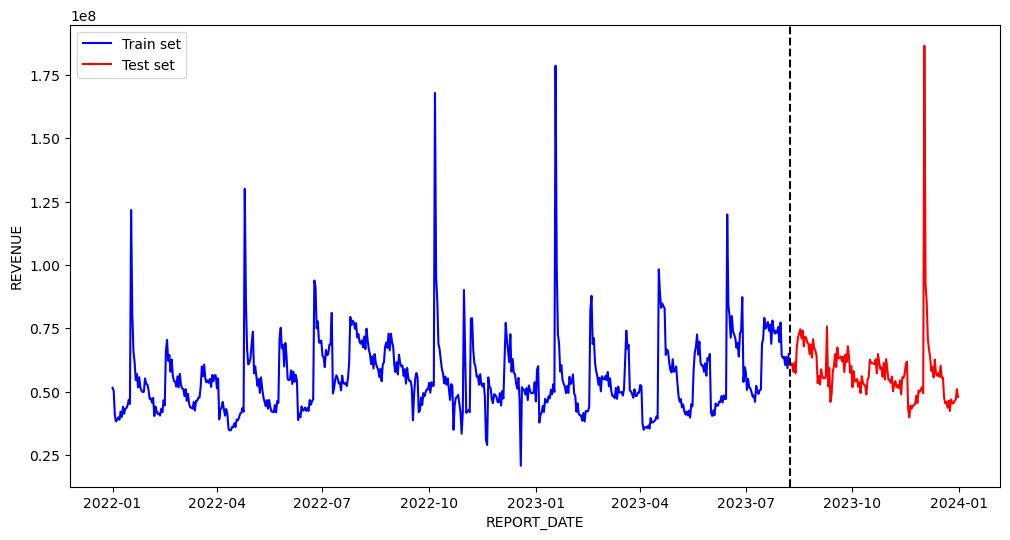

In [4]:
group_split_value = int(len(grouped_df)*0.8)


plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_df.iloc[:group_split_value], x='REPORT_DATE', y='REVENUE',c="b",label="Train set")
sns.lineplot(data=grouped_df.iloc[group_split_value:], x='REPORT_DATE', y='REVENUE',c="r",label="Test set")

plt.axvline(x=grouped_df.iloc[group_split_value:]["REPORT_DATE"].iloc[0], color='k', linestyle='--',)

## Looking for seasonal trends

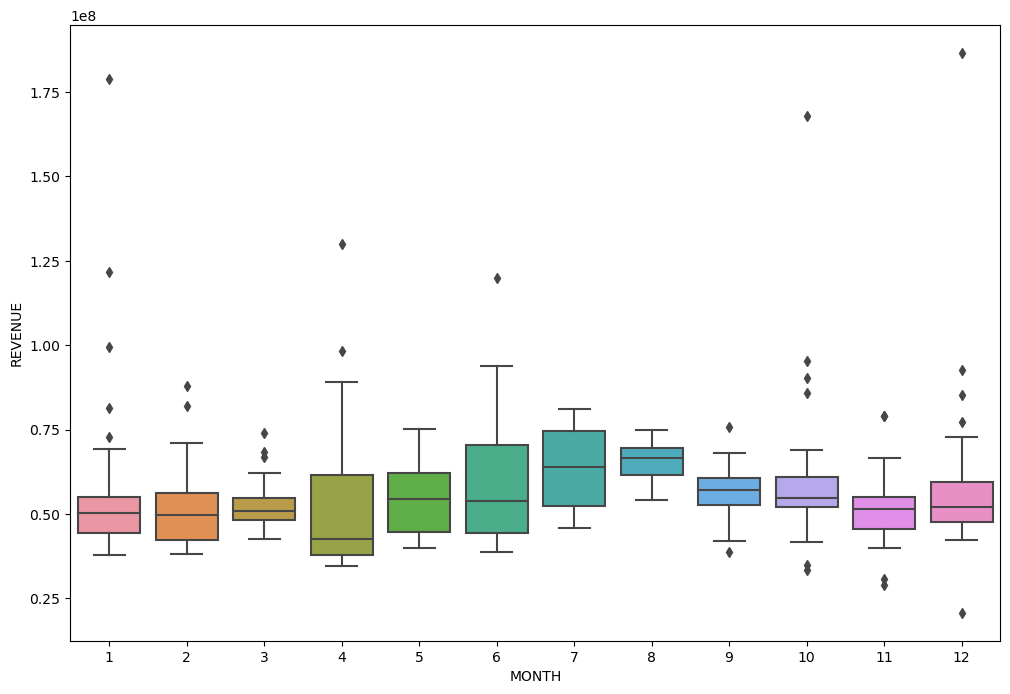

In [5]:
# Monthly trends
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data=grouped_df, x='MONTH', y='REVENUE')
plt.show()

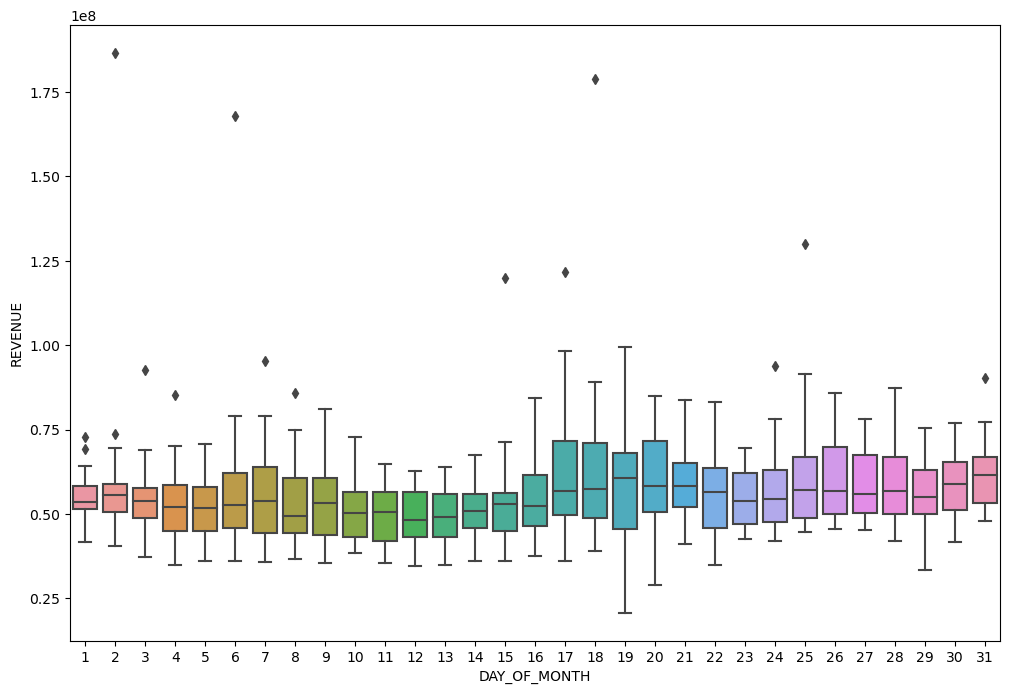

In [6]:
# Day of month trends
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data=grouped_df, x='DAY_OF_MONTH', y='REVENUE')
plt.show()

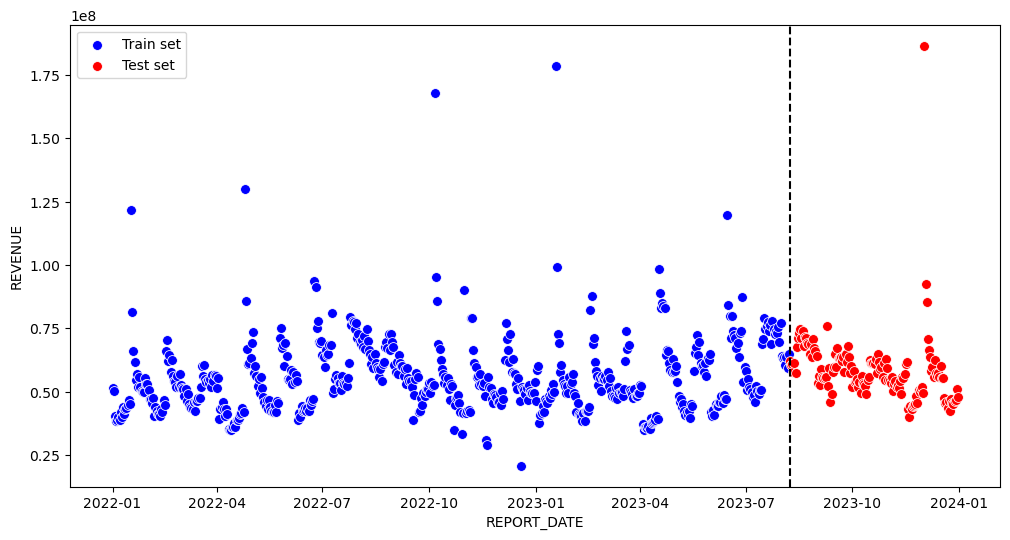

In [9]:
plt.figure(figsize=(12, 6))

sns.scatterplot(data=grouped_df.iloc[:group_split_value], x='REPORT_DATE', y='REVENUE', color="b", label="Train set", s=50)
sns.scatterplot(data=grouped_df.iloc[group_split_value:], x='REPORT_DATE', y='REVENUE', color="r", label="Test set", s=50)

plt.axvline(x=grouped_df.iloc[group_split_value:]["REPORT_DATE"].iloc[0], color='k', linestyle='--', label='Train/Test Split')
